
#                                               **Walmart Sales Forcasting**




---

# **Problem Statement**

By utilizing the Walmart store data, to develop a predictive model for Walmart sales forecasting, taking into account various relevant parameters.

# **Dataset Description**

The Walmart store dataset consists of four different CSV files, each containing various features related to the dataset.




*   The train.csv file includes the following columns: 'Store', 'Dept', 'Date',
'Weekly_Sales', and 'IsHoliday'.

*   The features.csv file contains the columns: 'Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', and 'IsHoliday'.

*   The stores.csv file includes the columns: 'Store', 'Type', and 'Size'.

*   Lastly, the test.csv file contains the columns: 'Store', 'Dept', 'Date', and 'IsHoliday'.

Each file serves a specific purpose and provides essential information for analysis, likely related to sales, store characteristics, and external factors like temperature and fuel prices.




# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load and read the CSV files

In [2]:
# Loading all the csv files
train_df = pd.read_csv('data/train.csv')
stores_df = pd.read_csv('data/stores.csv')
features_df = pd.read_csv('data/features.csv')
test_df = pd.read_csv('data/test.csv')

## **Section -1 Data Inspection**

### 1. Data Analysis of train_df Dataframe

In [3]:
# Checking some data points
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [4]:
train_df.shape

(421570, 5)

In [5]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


**Some columns are not in the required format to provide input to models, such as 'Date', which is in the object type, and 'IsHoliday', which is a boolean type**.

In [7]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

**train_df dataset contains 0 null values.**

In [8]:
train_df.duplicated().sum()

0

**train_df contains no duplicate values.**

In [9]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


**This is the statistical summary of the numerical columns of the train_df dataframe.**

### 2. Data Analysis of features_df Dataframe

In [10]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
features_df.shape

(8190, 12)

In [12]:
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [13]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [14]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

**Some columns contains the null values in the dataframe.**

In [15]:
features_df.duplicated().sum()

0

**There is no duplicate value in the dataframe.**

In [16]:
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


**This is the statistical summary of the numerical columns in the dataframe.**

### 3. Data Analysis of stores_df Dataframe

In [17]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [18]:
stores_df.shape

(45, 3)

In [19]:
stores_df.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [20]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [21]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

**stores dataframe is also having no null values.**

In [22]:
stores_df.duplicated().sum()

0

**There is no duplicate values in the dataframe.**

In [23]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


**This is the statistical summary of the dataframe.**

### 4. Data Analysis of test_df Dataframe

In [24]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [25]:
test_df.shape

(115064, 4)

In [26]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [28]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [29]:
test_df.duplicated().sum()

0

**test dataset has no null values as well as dupliicate values.**

In [30]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


## **Section-2 Merging Dataset and Data Analysis**

In [31]:
# Merging features and stores dataset on a common column
df = features_df.merge(stores_df, how='inner', on='Store')
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [32]:
# Getting info the combined data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


In [33]:
df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

**Only the columns MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5, CPI and Unemployment are having null values in the dataframe.**

In [34]:
df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,130287.600000
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,70713.000000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,126512.000000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


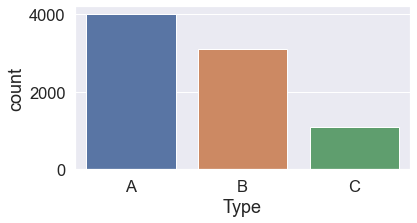

In [35]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.5)
sns.countplot(data = df, x = "Type")
plt.show()

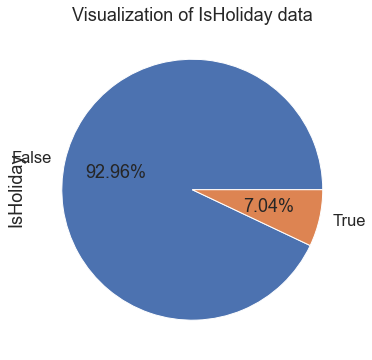

In [36]:
fig, ax = plt.subplots(figsize = (10,6))
train_df['IsHoliday'].value_counts()[:10].plot(kind='pie',autopct='%.2f%%')
ax.set_title('Visualization of IsHoliday data')
plt.show()

**We can observe from the plot, almost 93% time is the holiday.**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 1.1+ MB


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


**The "Date" column is currently in all the datasets is of object datatype. To work with this column effectively, we need to convert it into a datetime format.**

In [40]:
# Converting object type into datetime format
df['Date'] = pd.to_datetime(df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [41]:
df['Week'] = df.Date.dt.week # for the week data
df['Year'] = df.Date.dt.year # for the year data

<ipython-input-41-0f3d7fa013e1>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df.Date.dt.week # for the week data


In [42]:
# Displaying the 5 rows of the combined data
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,9,2010


In [43]:
# Merging with train_df
train_merge = train_df.merge(df, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [44]:
# Checking the shape of train merged data
train_merge.shape

(421570, 18)

In [45]:
# Merging with test_df
test_merge = test_df.merge(df, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [46]:
# Checking the shape of test merged data
test_merge.shape

(115064, 17)

In [47]:
# Visualizing the realtionship of each column with train merged data
def scatter(train_merge, column):
    plt.figure(figsize =(6,4))
    plt.scatter(train_merge[column] , train_merge['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

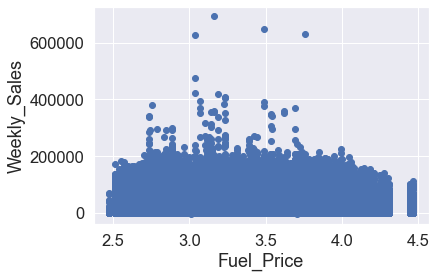

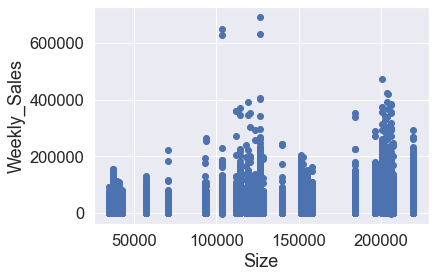

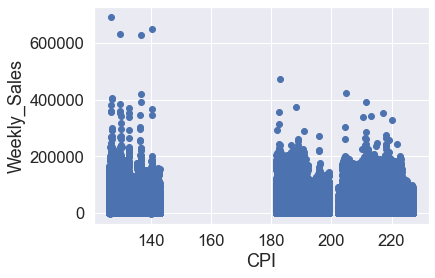

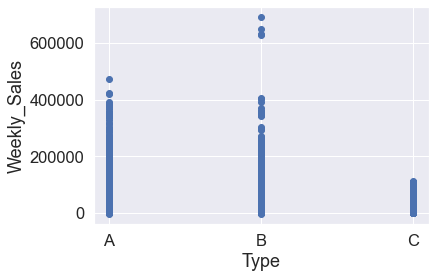

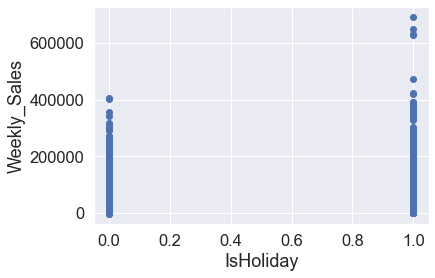

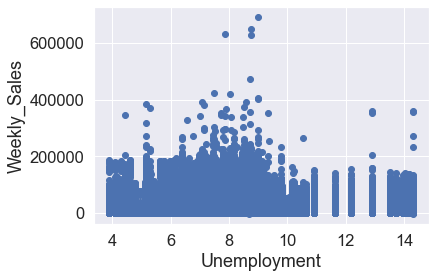

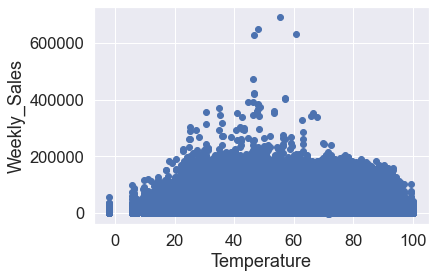

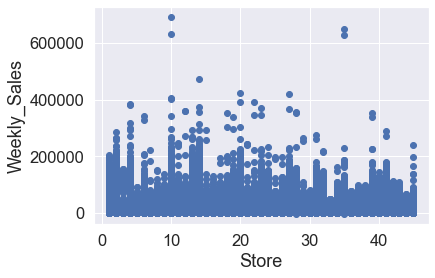

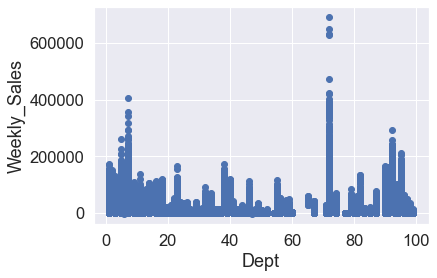

In [48]:
scatter(train_merge, 'Fuel_Price')  # with respect to Fuel_Price
scatter(train_merge, 'Size')  # with respect to Size
scatter(train_merge, 'CPI')  # with respect to CPI
scatter(train_merge, 'Type')  # with respect to Type
scatter(train_merge, 'IsHoliday') # with respect to IsHoliday
scatter(train_merge, 'Unemployment')  # with respect to Unemployment
scatter(train_merge, 'Temperature') # with respect to Temperature
scatter(train_merge, 'Store') # with respect to Store
scatter(train_merge, 'Dept')  # with respect to Dept

**From the above plots, we can observe that our data is not linear. As we can see that for particular value of featuresour target column is increasing.**

Text(0.5, 1.0, 'Weekly sales per year 2010 to 2012')

<Figure size 1440x720 with 0 Axes>

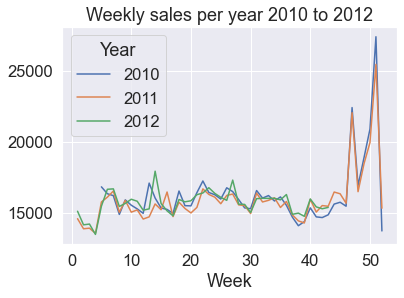

In [49]:
plt.figure(figsize=(20,10))
month_wise_sales = pd.pivot_table(train_merge, values = "Weekly_Sales", columns = "Year", index = "Week")
month_wise_sales.plot()
plt.title('Weekly sales per year 2010 to 2012')

**From the above plot, we can observe that for the years 2010 and 2011, weekly sales were high during the end months of the year. This observation suggests that our 'IsHoliday' column is correlated with our target variable.**

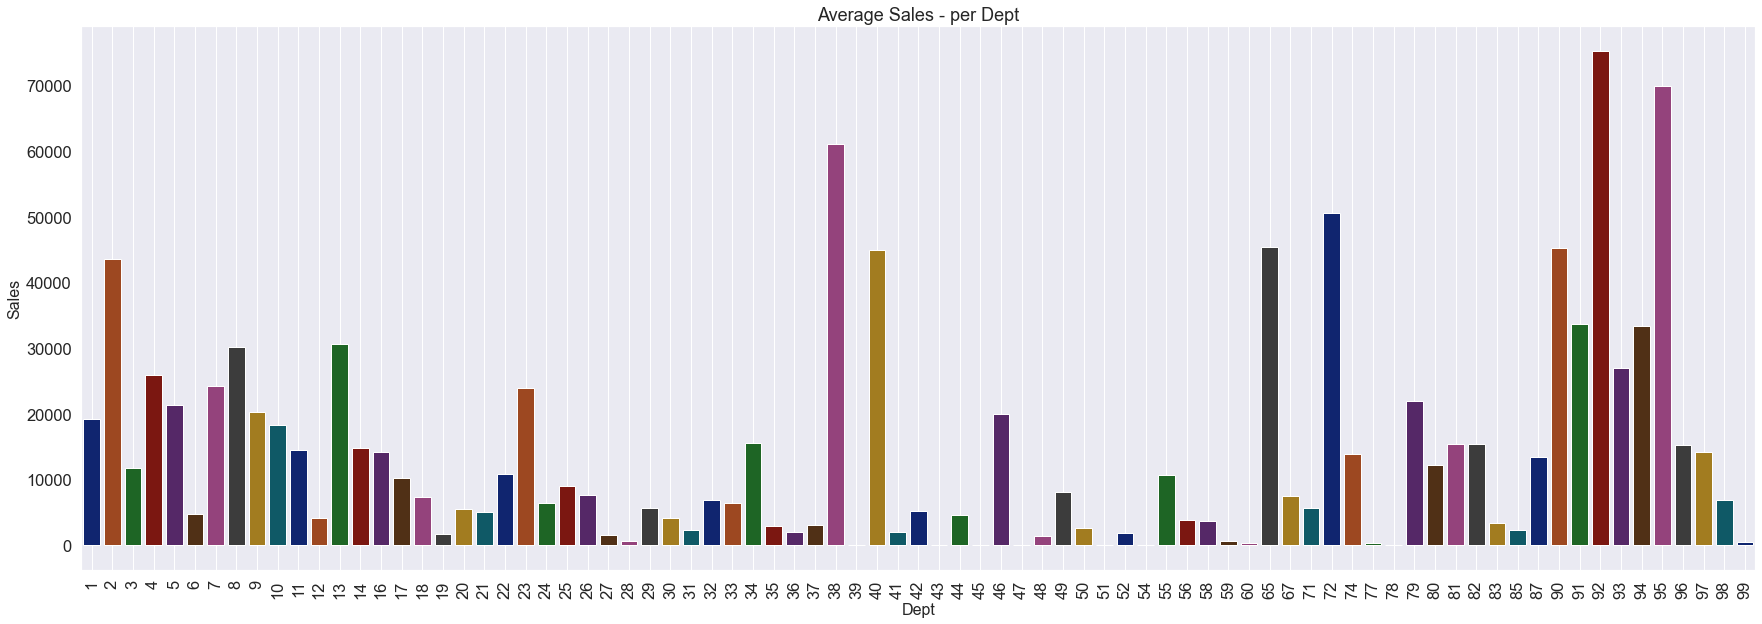

In [50]:
# Visualizing the Department wise Weekly sales
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()

plt.figure(figsize=(30, 10))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='dark')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.grid()
plt.title('Average Sales - per Dept', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Dept', fontsize=16)
plt.show()


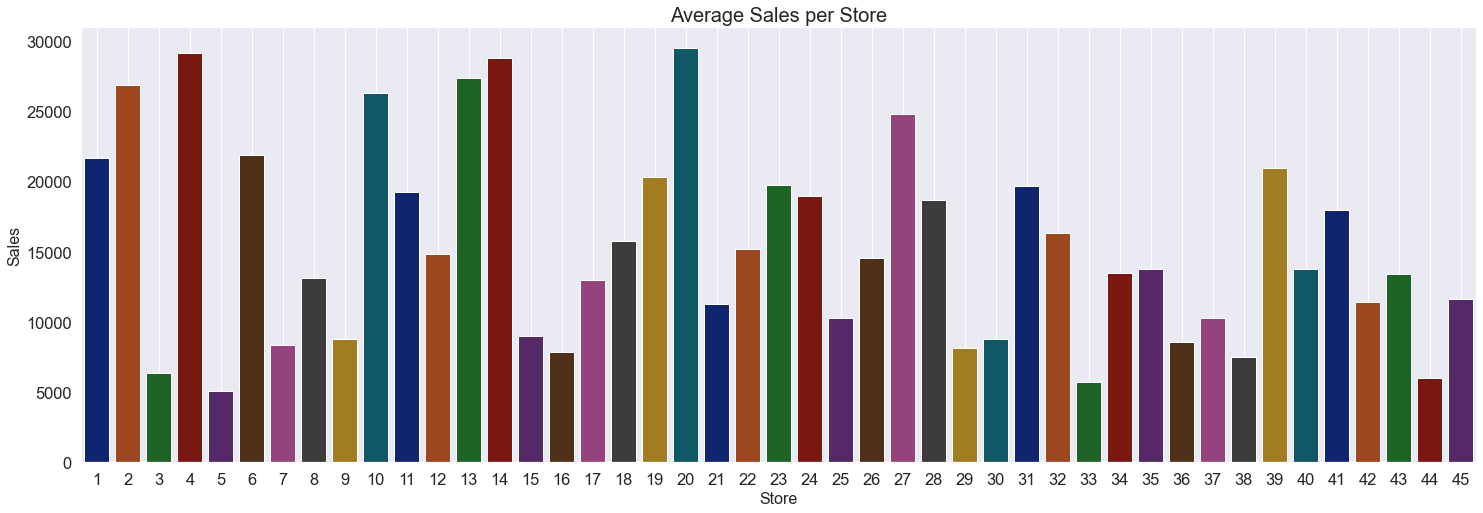

In [51]:
# Visulaizing the Store wise weekly sales
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()
plt.figure(figsize=(25,8))
sns.barplot(x = weekly_sales.index, y = weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

<ipython-input-52-5f6513167967>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


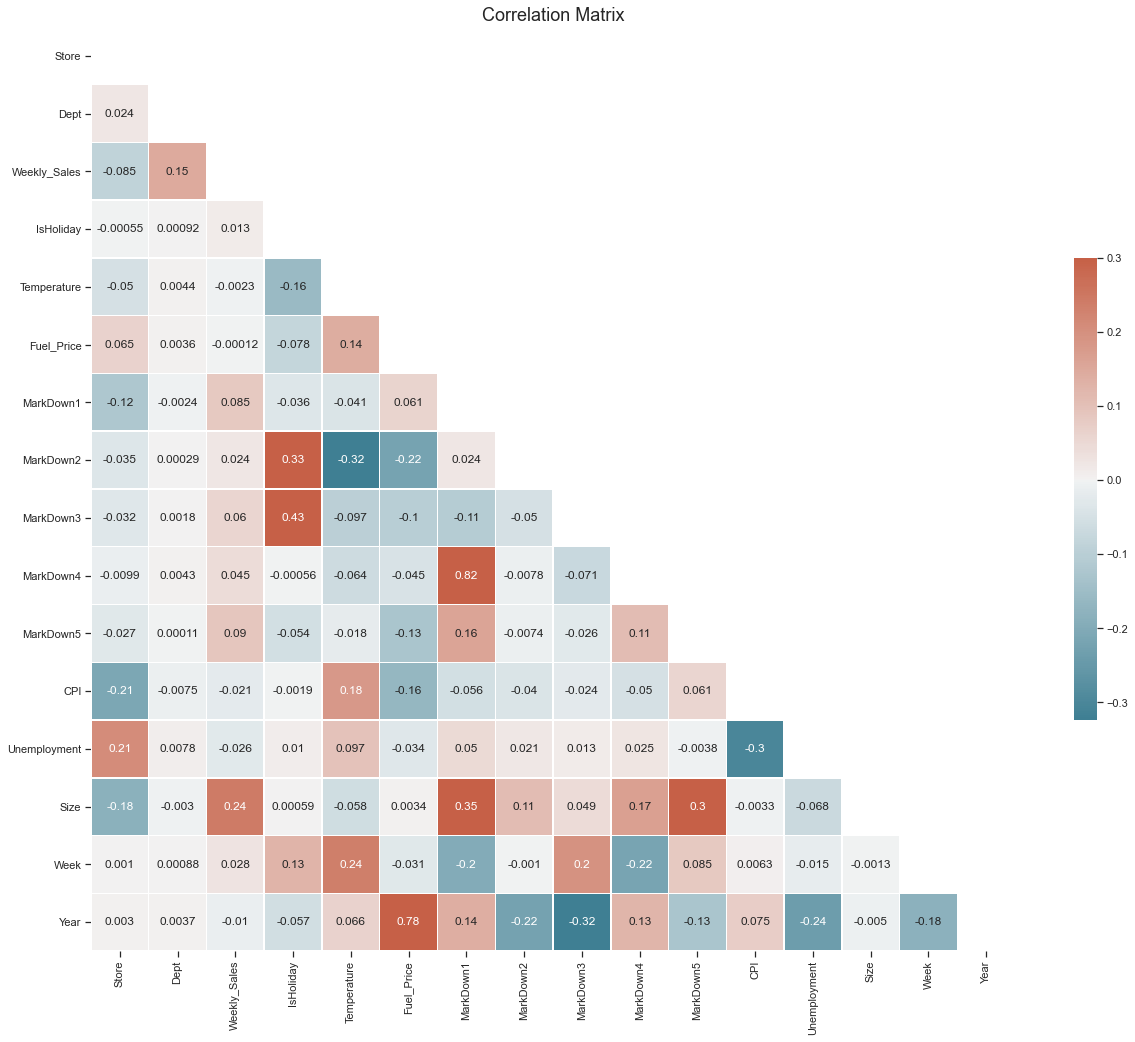

In [52]:
sns.set(style = "ticks")

corr = train_merge.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (21, 17))

# cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

**The correlation matrix clearly shows that some features are strongly correlated with the 'Weekly_Sales' feature, while others are weakly correlated with the target variable. Specifically, the features 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', and 'Fuel_Price' exhibit weak correlations with the 'Weekly_Sales'.**

## **Section- 3 Data Cleaning**

In [53]:
# Dropping down the variables that have weak correlation
train_merge = train_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_merge = test_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [54]:
train_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2010-02-05,24924.50,False,42.31,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,211.350143,8.106,A,151315,9,2010


In [55]:
test_merge.head()

,Store,Dept,Date,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Week,Year
0,1,1,2012-11-02,False,55.32,223.462779,6.573,A,151315,44,2012
1,1,1,2012-11-09,False,61.24,223.481307,6.573,A,151315,45,2012
2,1,1,2012-11-16,False,52.92,223.512911,6.573,A,151315,46,2012
3,1,1,2012-11-23,True,56.23,223.561947,6.573,A,151315,47,2012
4,1,1,2012-11-30,False,52.34,223.610984,6.573,A,151315,48,2012


In [56]:
enc = OneHotEncoder()

# Passing encoded columns

enc_data = pd.DataFrame(enc.fit_transform(train_merge[['IsHoliday', 'Type']]).toarray())
enc_data

# Merge with main
New_df = train_merge.join(enc_data)

In [57]:
New_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,CPI,Unemployment,Type,Size,Week,Year,0,1,2,3,4
0,1,1,2010-02-05,24924.50,False,42.31,211.096358,8.106,A,151315,5,2010,1.0,0.0,1.0,0.0,0.0
1,1,1,2010-02-12,46039.49,True,38.51,211.242170,8.106,A,151315,6,2010,0.0,1.0,1.0,0.0,0.0
2,1,1,2010-02-19,41595.55,False,39.93,211.289143,8.106,A,151315,7,2010,1.0,0.0,1.0,0.0,0.0
3,1,1,2010-02-26,19403.54,False,46.63,211.319643,8.106,A,151315,8,2010,1.0,0.0,1.0,0.0,0.0
4,1,1,2010-03-05,21827.90,False,46.50,211.350143,8.106,A,151315,9,2010,1.0,0.0,1.0,0.0,0.0


In [58]:
# Renaming the columns name based on the dataframe' column name
New_df.columns = ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
                'CPI', 'Unemployment', 'Type', 'Size', 'Week', 'Year',  'IsHoliday_F',  'IsHoliday_T', 'Type_A', 'Type_B', 'Type_C',]

In [59]:
# Dropping the columns
New_df = New_df.drop(columns = ['Type', 'IsHoliday', 'Date'])

In [60]:
New_df.head()

,Store,Dept,Weekly_Sales,Temperature,CPI,Unemployment,Size,Week,Year,IsHoliday_F,IsHoliday_T,Type_A,Type_B,Type_C
0,1,1,24924.50,42.31,211.096358,8.106,151315,5,2010,1.0,0.0,1.0,0.0,0.0
1,1,1,46039.49,38.51,211.242170,8.106,151315,6,2010,0.0,1.0,1.0,0.0,0.0
2,1,1,41595.55,39.93,211.289143,8.106,151315,7,2010,1.0,0.0,1.0,0.0,0.0
3,1,1,19403.54,46.63,211.319643,8.106,151315,8,2010,1.0,0.0,1.0,0.0,0.0
4,1,1,21827.90,46.50,211.350143,8.106,151315,9,2010,1.0,0.0,1.0,0.0,0.0


In [61]:
# Splitting the dataframe into X and Y
X = New_df[['Store','Dept','Temperature', 'CPI', 'Unemployment', 'Size','Week','Year', 'IsHoliday_F', 'IsHoliday_T',	'Type_A',	'Type_B',	 'Type_C']] # Selecting the values to be taken in the X
y = New_df['Weekly_Sales']

In [62]:
X.shape

(421570, 13)

In [63]:
y.shape

(421570,)

In [64]:
# Standardize the data
scaler = StandardScaler()
model = scaler.fit(X)
scaled_data = model.transform(X)

In [65]:
scaled_data

array([[-1.65819926, -1.41874236, -0.96379804, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       [-1.65819926, -1.41874236, -1.16978344, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       [-1.65819926, -1.41874236, -1.09280995, ...,  0.97797803,
        -0.79593806, -0.3352628 ],
       ...,
       [ 1.78325781,  1.76241805, -0.30464475, ..., -1.02251786,
         1.25637918, -0.3352628 ],
       [ 1.78325781,  1.76241805, -0.19623138, ..., -1.02251786,
         1.25637918, -0.3352628 ],
       [ 1.78325781,  1.76241805, -0.06721947, ..., -1.02251786,
         1.25637918, -0.3352628 ]])

In [66]:
# Converting the scaled data into dataframe
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.658199,-1.418742,-0.963798,1.018774,0.078201,0.239209,-1.471661,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263
1,-1.658199,-1.418742,-1.169783,1.022498,0.078201,0.239209,-1.400999,-1.215487,-3.634961,3.634961,0.977978,-0.795938,-0.335263
2,-1.658199,-1.418742,-1.092810,1.023697,0.078201,0.239209,-1.330337,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263
3,-1.658199,-1.418742,-0.729625,1.024476,0.078201,0.239209,-1.259675,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263
4,-1.658199,-1.418742,-0.736672,1.025255,0.078201,0.239209,-1.189013,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263


In [67]:
scaled_data.columns = ['Store','Dept','Temperature', 'CPI', 'Unemployment', 'Size','Week','Year', 'IsHoliday_F', 'IsHoliday_T',	'Type_A',	'Type_B',	 'Type_C']

In [68]:
scaled_data.head()

,Store,Dept,Temperature,CPI,Unemployment,Size,Week,Year,IsHoliday_F,IsHoliday_T,Type_A,Type_B,Type_C
0,-1.658199,-1.418742,-0.963798,1.018774,0.078201,0.239209,-1.471661,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263
1,-1.658199,-1.418742,-1.169783,1.022498,0.078201,0.239209,-1.400999,-1.215487,-3.634961,3.634961,0.977978,-0.795938,-0.335263
2,-1.658199,-1.418742,-1.092810,1.023697,0.078201,0.239209,-1.330337,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263
3,-1.658199,-1.418742,-0.729625,1.024476,0.078201,0.239209,-1.259675,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263
4,-1.658199,-1.418742,-0.736672,1.025255,0.078201,0.239209,-1.189013,-1.215487,0.275106,-0.275106,0.977978,-0.795938,-0.335263


In [69]:
# Splitting the data into Train and Test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **Section- 4 Model Building**

In [70]:
# Building the Decision Tree Regressor model
regressor = DecisionTreeRegressor(random_state=0)

In [71]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [72]:
# Testing the performance of the model on test data
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, regressor.predict(X_test))))
print("R-Squared: ", r2_score(y_test, regressor.predict(X_test)))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  5157.707638972496
R-Squared:  0.9488118803635842


In [73]:
# Building the Random Forest Regressor model
regr = RandomForestRegressor()

In [74]:
regr.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [75]:
# Testing the performance of the model on test data
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, regr.predict(X_test))))
print("R-Squared: ", r2_score(y_test, regr.predict(X_test)))

Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  3741.3115720243595
R-Squared:  0.9730658366847582
